In [101]:
# Imports
import pandas as pd
import sqlite3
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt


%matplotlib inline

In [102]:
# Establish a connection to the SQLite3 database
conn = sqlite3.connect('data\im.db')

In [103]:
# Explore the data structure and primary keys
master_table = pd.read_sql("""
SELECT *
FROM sqlite_master
WHERE type = 'table'
""", conn)
master_table

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [104]:
# Explore each table's contents
print("movie_basics")
display(pd.read_sql("""
SELECT *, COUNT(*)
FROM movie_basics
LIMIT 5
""", conn))

print("directors")
display(pd.read_sql("""
SELECT *, COUNT(*)
FROM directors
LIMIT 5
""", conn))

print("known_for")
display(pd.read_sql("""
SELECT *, COUNT(*)
FROM known_for
LIMIT 5
""", conn))

print("movie_akas")
display(pd.read_sql("""
SELECT *, COUNT(*)
FROM movie_akas
LIMIT 5
""", conn))

print("movie_ratings")
display(pd.read_sql("""
SELECT *, COUNT(*)
FROM movie_ratings
LIMIT 5
""", conn))

print("principals")
display(pd.read_sql("""
SELECT *, COUNT(*)
FROM principals
LIMIT 5
""", conn))

print("writers")
display(pd.read_sql("""
SELECT *, COUNT(*)
FROM writers
LIMIT 5
""", conn))

movie_basics


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,COUNT(*)
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",146144


directors


,movie_id,person_id,COUNT(*)
0,tt0285252,nm0899854,291174


known_for


,person_id,movie_id,COUNT(*)
0,nm0061671,tt0837562,1638260


movie_akas


,movie_id,ordering,title,region,language,types,attributes,is_original_title,COUNT(*)
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0,331703


movie_ratings


,movie_id,averagerating,numvotes,COUNT(*)
0,tt10356526,8.3,31,73856


principals


,movie_id,ordering,person_id,category,job,characters,COUNT(*)
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]",1028186


writers


,movie_id,person_id,COUNT(*)
0,tt0285252,nm0899854,255873


Notes:
- SELECT * (movie titles, year, runtime, and genres) FROM movie_basics table by connecting with movie_id
- SELECT averagerating FROM movie_ratings

In [105]:
df = pd.read_csv('data/tn.movie_budgets.csv')
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [107]:
df['movie']

0                                            Avatar
1       Pirates of the Caribbean: On Stranger Tides
2                                      Dark Phoenix
3                           Avengers: Age of Ultron
4                 Star Wars Ep. VIII: The Last Jedi
                           ...                     
5777                                         Red 11
5778                                      Following
5779                  Return to the Land of Wonders
5780                           A Plague So Pleasant
5781                              My Date With Drew
Name: movie, Length: 5782, dtype: object

In [108]:
df['worldwide_gross'].value_counts()

worldwide_gross
$0             367
$8,000,000       9
$2,000,000       6
$7,000,000       6
$4,000,000       4
              ... 
$39,498,360      1
$94,875,000      1
$77,593,167      1
$36,299,670      1
$181,041         1
Name: count, Length: 5356, dtype: int64

In [109]:
df.loc[df['domestic_gross'] == '$0']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,95,"Dec 31, 2020",Moonfall,"$150,000,000",$0,$0
479,80,"Dec 13, 2017",Bright,"$90,000,000",$0,$0
480,81,"Dec 31, 2019",Army of the Dead,"$90,000,000",$0,$0
535,36,"Feb 21, 2020",Call of the Wild,"$82,000,000",$0,$0
617,18,"Dec 31, 2012",AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,"$77,600,000",$0,"$60,680,125"
...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,$0
5764,65,"Dec 31, 2007",Tin Can Man,"$12,000",$0,$0
5771,72,"May 19, 2015",Family Motocross,"$10,000",$0,$0
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0


In [110]:
df.loc[df['worldwide_gross'] == '$0']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,95,"Dec 31, 2020",Moonfall,"$150,000,000",$0,$0
479,80,"Dec 13, 2017",Bright,"$90,000,000",$0,$0
480,81,"Dec 31, 2019",Army of the Dead,"$90,000,000",$0,$0
535,36,"Feb 21, 2020",Call of the Wild,"$82,000,000",$0,$0
670,71,"Aug 30, 2019",PLAYMOBIL,"$75,000,000",$0,$0
...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,$0
5764,65,"Dec 31, 2007",Tin Can Man,"$12,000",$0,$0
5771,72,"May 19, 2015",Family Motocross,"$10,000",$0,$0
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0


In [111]:
df.loc[((df['domestic_gross'] != '$0') & (df['worldwide_gross'] == '$0') | ((df['domestic_gross'] == '$0') & (df['worldwide_gross'] != '$0')))]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
617,18,"Dec 31, 2012",AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,"$77,600,000",$0,"$60,680,125"
619,20,"Jan 22, 2019",Renegades,"$77,500,000",$0,"$1,521,672"
820,21,"Oct 26, 2018",Air Strike,"$65,000,000",$0,"$516,279"
1325,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1367,68,"Dec 31, 2006",Les BronzÃ©s 3: amis pour la vie,"$42,000,000",$0,"$83,833,602"
...,...,...,...,...,...,...
5590,91,"Mar 24, 2015",Along the Roadside,"$250,000",$0,"$3,234"
5652,53,"Dec 31, 2015",Lumea e a mea,"$168,000",$0,"$29,678"
5661,62,"Dec 31, 2013",Speak No Evil,"$150,000",$0,"$32,927"
5705,6,"Dec 31, 2011",Absentia,"$70,000",$0,"$8,555"


Notes:
- Movies will need to be matched with movie_id while accounting for alternate titles
- Data includes release date (not just year), budget, domestic gross, worldwide gross

Potential routes of analysis:
- ROI per genre (if wanting best return on investment)
- Ratings per genre (if seeking awards)
- ROI by budget (to determine a reasonable budget -- Low: <$5M, Medium: $5-50M, High: >$50M)
- ROI by length of movie (to determine best timeframe -- Short: <90 mins, Medium: 90-120 mins, Long: >120 mins)

In [112]:
# Consolidate into one dataframe
sql_movies = pd.read_sql("""
SELECT *
FROM movie_basics
    JOIN movie_ratings
        USING(movie_id)
""", conn)

sql_movies.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [113]:
alt_titles = pd.read_sql("""
SELECT *
FROM movie_akas
""", conn)
alt_titles.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [114]:
alt_dict = dict(zip(alt_titles['title'], alt_titles['movie_id']))
len(alt_dict)

252781

In [115]:
df['movie_id'] = df['movie'].map(alt_dict)
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,tt7837402
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,tt2107644


In [125]:
merge_df = pd.merge(sql_movies, df, on='movie_id')
merge_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0339736,The Evil Within,The Evil Within,2017,98.0,Horror,5.6,2420,43,"Oct 10, 2014",Whiplash,"$3,300,000","$13,092,006","$38,969,037"
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864"


In [119]:
"""
Function to replace '$' and commas from 'production_budget', 'domestic_gross', 'worldwide_gross'
Takes in dataframe and column names
Returns cleaned version saved over the original dataframe
"""

def clean_currency_columns(df, columns):
    for column in columns:
        df.loc[:, column] = df[column].replace({'\$': '', ',': ''}, regex=True).astype(float)
    return df

In [126]:
# Defines the columns to clean
columns_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']

# Calls the function
merge_df = clean_currency_columns(merge_df, columns_to_clean)
merge_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
1,tt0339736,The Evil Within,The Evil Within,2017,98.0,Horror,5.6,2420,43,"Oct 10, 2014",Whiplash,3300000.0,13092006.0,38969037.0
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014",A Walk Among the Tombstones,28000000.0,26017685.0,62108587.0
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1648854864.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,tt9225192,Unstoppable,Seongnan hwangso,2018,116.0,"Action,Crime",6.5,576,1,"Nov 14, 1980",Raging Bull,18000000.0,23380203.0,23380203.0
2188,tt9392532,Neighbors,Neighbors,2018,90.0,"Comedy,Drama",7.6,18,64,"May 9, 2014",Neighbors,18000000.0,150086800.0,270944428.0
2189,tt9415552,Tankers,Nesokrushimyy,2018,90.0,"Action,Drama,History",5.7,1031,27,"Aug 25, 2006",Invincible,40000000.0,57806952.0,58501127.0
2190,tt9680064,Walter,Walter,2019,90.0,Comedy,6.4,35,96,"Mar 13, 2015",Walter,700000.0,0.0,0.0


In [131]:
"""
Function used to compare 'domestic_gross' and 'worldwide_gross' and return the higher value
Takes in dataframe and column names
Returns cleaned version saved over the original dataframe
"""

def calculate_revenue(row):
    if row['domestic_gross'] >= row['worldwide_gross']:
        return row['domestic_gross']
    else:
        return row['worldwide_gross']

merge_df['revenue'] = merge_df.apply(calculate_revenue, axis=1)
merge_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0,7.370600e+04
1,tt0339736,The Evil Within,The Evil Within,2017,98.0,Horror,5.6,2420,43,"Oct 10, 2014",Whiplash,3300000.0,13092006.0,38969037.0,3.896904e+07
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0,1.878612e+08
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014",A Walk Among the Tombstones,28000000.0,26017685.0,62108587.0,6.210859e+07
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1648854864.0,1.648855e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,tt9225192,Unstoppable,Seongnan hwangso,2018,116.0,"Action,Crime",6.5,576,1,"Nov 14, 1980",Raging Bull,18000000.0,23380203.0,23380203.0,2.338020e+07
2188,tt9392532,Neighbors,Neighbors,2018,90.0,"Comedy,Drama",7.6,18,64,"May 9, 2014",Neighbors,18000000.0,150086800.0,270944428.0,2.709444e+08
2189,tt9415552,Tankers,Nesokrushimyy,2018,90.0,"Action,Drama,History",5.7,1031,27,"Aug 25, 2006",Invincible,40000000.0,57806952.0,58501127.0,5.850113e+07
2190,tt9680064,Walter,Walter,2019,90.0,Comedy,6.4,35,96,"Mar 13, 2015",Walter,700000.0,0.0,0.0,0.000000e+00


In [132]:
relevant_cols = [
    'primary_title',
    'runtime_minutes',
    'genres',
    'averagerating',
    "release_date",
    'production_budget',
    'revenue'
]

df_relevant = merge_df[relevant_cols]
df_relevant

,primary_title,runtime_minutes,genres,averagerating,release_date,production_budget,revenue
0,Foodfight!,91.0,"Action,Animation,Comedy",1.9,"Dec 31, 2012",45000000.0,7.370600e+04
1,The Evil Within,98.0,Horror,5.6,"Oct 10, 2014",3300000.0,3.896904e+07
2,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,"Dec 25, 2013",91000000.0,1.878612e+08
3,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,"Sep 19, 2014",28000000.0,6.210859e+07
4,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,"Jun 12, 2015",215000000.0,1.648855e+09
...,...,...,...,...,...,...,...
2187,Unstoppable,116.0,"Action,Crime",6.5,"Nov 14, 1980",18000000.0,2.338020e+07
2188,Neighbors,90.0,"Comedy,Drama",7.6,"May 9, 2014",18000000.0,2.709444e+08
2189,Tankers,90.0,"Action,Drama,History",5.7,"Aug 25, 2006",40000000.0,5.850113e+07
2190,Walter,90.0,Comedy,6.4,"Mar 13, 2015",700000.0,0.000000e+00


In [136]:
# Return on Investent (roi) is a percentage of the initial budget that the movie brought in
df_relevant.loc[:, 'roi'] = df_relevant['revenue'] / df_relevant['production_budget'] * 100
df_relevant

,primary_title,runtime_minutes,genres,averagerating,release_date,production_budget,revenue,roi
0,Foodfight!,91.0,"Action,Animation,Comedy",1.9,"Dec 31, 2012",45000000.0,7.370600e+04,0.163791
1,The Evil Within,98.0,Horror,5.6,"Oct 10, 2014",3300000.0,3.896904e+07,1180.879909
2,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,"Dec 25, 2013",91000000.0,1.878612e+08,206.44086
3,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,"Sep 19, 2014",28000000.0,6.210859e+07,221.816382
4,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,"Jun 12, 2015",215000000.0,1.648855e+09,766.909239
...,...,...,...,...,...,...,...,...
2187,Unstoppable,116.0,"Action,Crime",6.5,"Nov 14, 1980",18000000.0,2.338020e+07,129.890017
2188,Neighbors,90.0,"Comedy,Drama",7.6,"May 9, 2014",18000000.0,2.709444e+08,1505.246822
2189,Tankers,90.0,"Action,Drama,History",5.7,"Aug 25, 2006",40000000.0,5.850113e+07,146.252818
2190,Walter,90.0,Comedy,6.4,"Mar 13, 2015",700000.0,0.000000e+00,0.0


In [137]:
# Split 'genres' to make lists. Then use explode to list each title under each genre
df_relevant.loc[:, 'genres'] = df_relevant['genres'].str.split(',')
df_genre = df_relevant.explode('genres')
df_genre.head()

,primary_title,runtime_minutes,genres,averagerating,release_date,production_budget,revenue,roi
0,Foodfight!,91.0,Action,1.9,"Dec 31, 2012",45000000.0,73706.0,0.163791
0,Foodfight!,91.0,Animation,1.9,"Dec 31, 2012",45000000.0,73706.0,0.163791
0,Foodfight!,91.0,Comedy,1.9,"Dec 31, 2012",45000000.0,73706.0,0.163791
1,The Evil Within,98.0,Horror,5.6,"Oct 10, 2014",3300000.0,38969037.0,1180.879909
2,The Secret Life of Walter Mitty,114.0,Adventure,7.3,"Dec 25, 2013",91000000.0,187861183.0,206.44086


In [138]:
# Only a handful of nulls in runtime and in genres
df_relevant.isna().sum()

primary_title         0
runtime_minutes      65
genres                5
averagerating         0
release_date          0
production_budget     0
revenue               0
roi                   0
dtype: int64

In [139]:
genre_counts = df_genre.groupby('genres').size().reset_index(name='count')
genre_counts

,genres,count
0,Action,544
1,Adventure,413
2,Animation,120
3,Biography,167
4,Comedy,658
5,Crime,299
6,Documentary,131
7,Drama,1092
8,Family,125
9,Fantasy,156


In [167]:
ratings_by_genre = df_genre.groupby('genres')['averagerating'].mean().round(1).reset_index()
ratings_by_genre = ratings_by_genre.sort_values(by='averagerating', ascending=False)

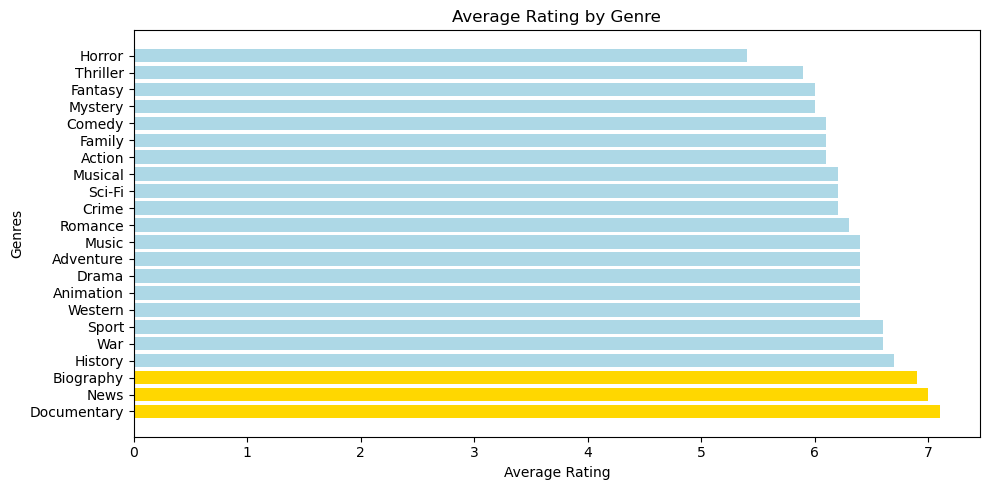

In [180]:
colors = ['gold' if i < 3 else 'lightblue' for i in range(len(ratings_by_genre))]

fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(ratings_by_genre['genres'], ratings_by_genre['averagerating'], color=colors)
ax.set_title('Average Rating by Genre')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Genres')
plt.tight_layout();

In [182]:
df_relevant.loc[df_relevant['genres'] == 'News']

,primary_title,runtime_minutes,genres,averagerating,release_date,production_budget,revenue,roi


Recommendation 1: Create a movie that is either a documentary or biography

In [140]:
df_relevant.loc[df_relevant['roi'] == 0]

,primary_title,runtime_minutes,genres,averagerating,release_date,production_budget,revenue,roi
6,Anderson's Cross,98.0,"[Comedy, Drama, Romance]",5.5,"Dec 31, 2010",300000.0,0.0,0.0
26,House at the End of the Drive,91.0,"[Horror, Thriller]",6.5,"Dec 31, 2014",1400000.0,0.0,0.0
39,Barry Munday,95.0,"[Comedy, Drama, Romance]",5.9,"Oct 1, 2010",3000000.0,0.0,0.0
99,The Dead Undead,89.0,"[Action, Horror, Sci-Fi]",3.0,"Dec 31, 2010",1100000.0,0.0,0.0
102,Freaky Deaky,90.0,"[Comedy, Crime, Thriller]",6.1,"Dec 31, 2011",6000000.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2137,Rust,100.0,[Drama],6.6,"Oct 5, 2010",250000.0,0.0,0.0
2152,Red 11,77.0,"[Horror, Sci-Fi, Thriller]",5.6,"Dec 31, 2018",7000.0,0.0,0.0
2164,Blinded by the Light,117.0,"[Biography, Comedy, Drama]",6.2,"Aug 14, 2019",15000000.0,0.0,0.0
2185,Butterfly,80.0,"[Documentary, Sport]",7.8,"Dec 31, 2010",250000.0,0.0,0.0
